In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")

## Rosenbrock function and its gradient

In [2]:
def f(x, y, a=1, b=100):  # Rosenbrock function
    return (a - x) ** 2 + b * (y - x**2) ** 2


def grad_f(x, y, a=1, b=100) -> np.ndarray:
    df_dx = -2 * (a - x) - 2 * b * (y - x**2) * 2 * x
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])


def numerical_grad_f(x, y, fun=f, delta=1e-6) -> np.ndarray:
    df_dx = (fun(x + delta, y) - fun(x - delta, y)) / (2 * delta)
    df_dy = (fun(x, y + delta) - fun(x, y - delta)) / (2 * delta)
    return np.array([df_dx, df_dy])

## How Rosenbock function looks like?

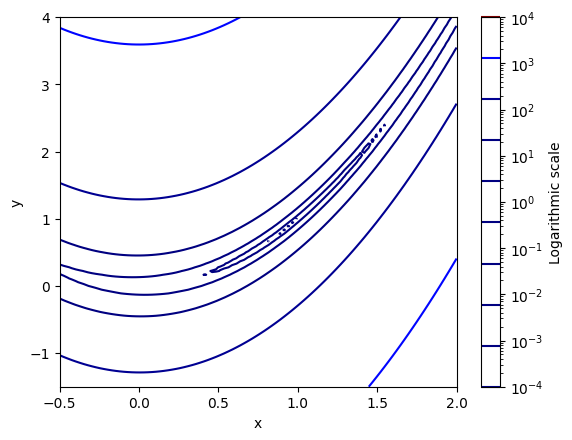

In [3]:
X, Y = np.meshgrid(np.linspace(-0.5, 2, 100), np.linspace(-1.5, 4, 100))
Z = f(X, Y)

contour = plt.contour(X, Y, Z, np.logspace(-4, 4, 10, base=10), cmap="jet")
plt.xlabel("x")
plt.ylabel("y")

cbar = plt.colorbar(contour)
cbar.set_label("Logarithmic scale")
cbar.set_ticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])
cbar.ax.set_yscale("log")

plt.show()

# How to derive the optimal step for gradient calculation?

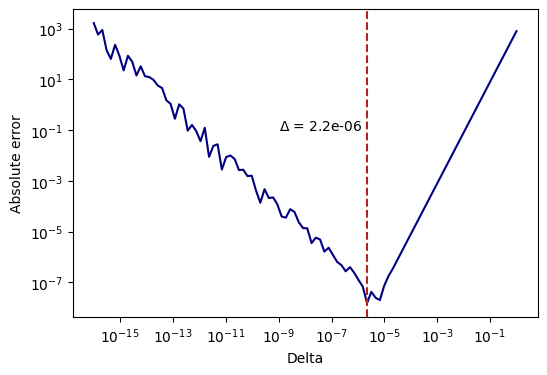

In [4]:
deltas = np.logspace(-16, 0, 100)
errors = [np.linalg.norm(np.abs((numerical_grad_f(2, 2, delta=delta) - grad_f(2, 2)))) for delta in deltas]
optimal_delta = deltas[np.argmin(errors)]


fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(deltas, errors, color="navy")
ax.axvline(optimal_delta, color="firebrick", ls="--")
ax.text(1e-9, 1e-1, rf"$\Delta$ = {optimal_delta:.1e}", transform=ax.transData)

ax.set_xlabel("Delta")
ax.set_ylabel("Absolute error")
ax.set_xscale("log")
ax.set_yscale("log")

In [5]:
def numerical_grad_f(x, y, fun=f) -> np.ndarray:
    delta = 2.2e-6
    df_dx = (fun(x + delta, y) - fun(x - delta, y)) / (2 * delta)
    df_dy = (fun(x, y + delta) - fun(x, y - delta)) / (2 * delta)
    return np.array([df_dx, df_dy])

# Optimization methods (Gradient Descent vs Adam)

In [6]:
# Gradient Descent optimization
def gradient_descent_optimization(
    starting_point: list[float, float], iterations: int
) -> Tuple[np.ndarray[float], np.ndarray[float]]:
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    x = np.array(starting_point)

    for _ in range(iterations):
        grad = numerical_grad_f(x[0], x[1])
        x = x - 0.0002 * grad  # Update parameters using gradient descent
        # Store results
        x_values.append(x[0])
        y_values.append(x[1])

    return np.array(x_values), np.array(y_values)


# Adam optimization
def adam_optimization(
    starting_point: list[float, float], iterations: int
) -> Tuple[np.ndarray[float], np.ndarray[float]]:
    # Adam Optimizer Parameters
    alpha = 0.5  # Learning rate
    beta1 = 0.8  # Exponential decay rate for the first moment estimates
    beta2 = 0.999  # Exponential decay rate for the second moment estimates
    epsilon = 1e-10  # Small value to avoid division by zero

    x_values = [starting_point[0]]
    y_values = [starting_point[1]]

    m = np.array([0.0, 0.0])  # First moment vector
    v = np.array([0.0, 0.0])  # Second moment vector
    x = np.array(starting_point)

    for t in range(1, iterations + 1):
        grad = numerical_grad_f(x[0], x[1])

        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * grad
        # Update biased second moment estimate
        v = beta2 * v + (1 - beta2) * (grad**2)

        # Compute bias-corrected first moment estimate
        m_hat = m / (1 - beta1**t)
        # Compute bias-corrected second moment estimate
        v_hat = v / (1 - beta2**t)

        # Update parameters
        x = x - alpha * m_hat / (np.sqrt(v_hat) + epsilon)

        # Store results
        x_values.append(x[0])
        y_values.append(x[1])

    return np.array(x_values), np.array(y_values)

In [7]:
# Starting point and number of iterations
starting_point = [1, 1.75]
iterations = 150

# Perform Adam optimization
x_values_adam, y_values_adam = adam_optimization(starting_point, iterations)
x_values_gd, y_values_gd = gradient_descent_optimization(starting_point, iterations)

# Plot the optimization path
X, Y = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
Z = f(X, Y)

# Let's construct a visualization of optimization algorithm

## Generate a figure

In [8]:
fig = plt.figure(figsize=(12, 6))
fig;

<Figure size 1200x600 with 0 Axes>

In [9]:
import matplotlib.colors as colors

## 2D contour plot with optimization paths

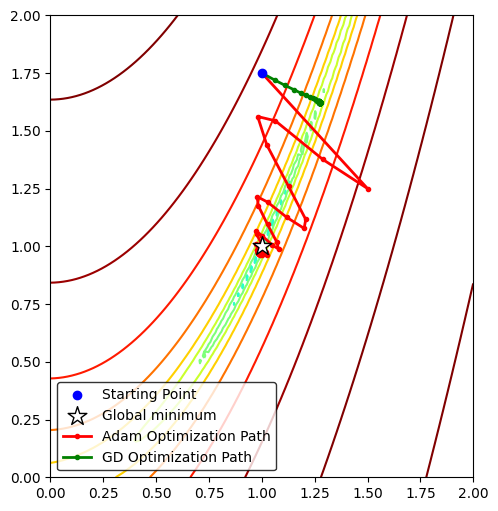

In [10]:
ax1 = fig.add_subplot(1, 2, 1)

ax1.contour(X, Y, Z, levels=np.logspace(-5, 3, 15), cmap="jet", vmin=1e-4, vmax=1e2, norm=colors.LogNorm())

ax1.scatter(*starting_point, color="blue", label="Starting Point", zorder=5)
ax1.scatter(1, 1, color="white", label="Global minimum", marker="*", zorder=5, edgecolors="black", s=200)

(line_adam,) = ax1.plot(
    x_values_adam,
    y_values_adam,
    "r.-",
    label="Adam Optimization Path",
    alpha=1,
    lw=2,
)
(line_gd,) = ax1.plot(x_values_gd, y_values_gd, "g.-", label="GD Optimization Path", alpha=1, lw=2)

legend_ax1 = ax1.legend(edgecolor="k")

fig

## The convergence of the objective function

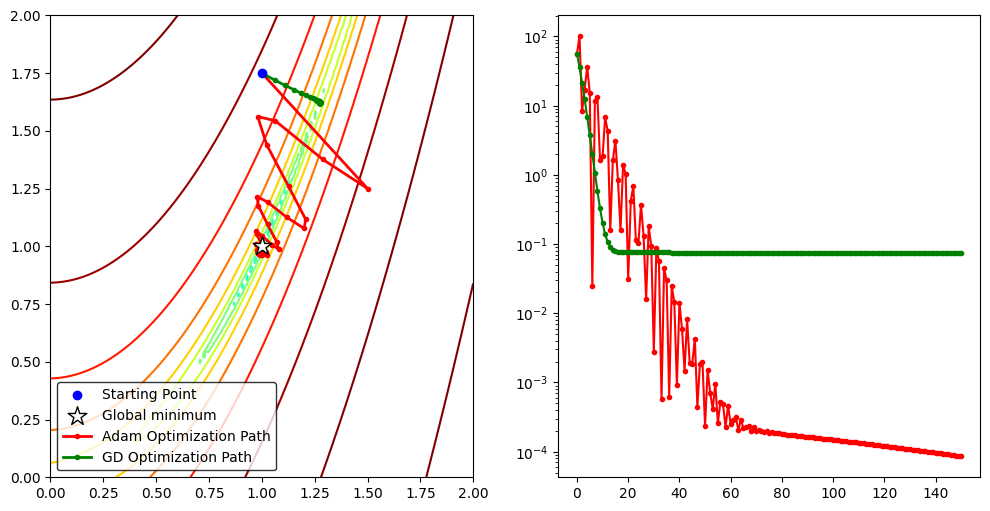

In [11]:
ax2 = fig.add_subplot(1, 2, 2)

iterations = list(range(len(x_values_adam)))
convergence_adam = f(x_values_adam, y_values_adam)
(line_convergence_adam,) = ax2.plot(iterations, convergence_adam, "r.-")

convergence_gd = f(x_values_gd, y_values_gd)
(line_convergence_gd,) = ax2.plot(iterations, convergence_gd, "g.-")

ax2.set_yscale("log")

fig

## Working with axes, labels and ticks

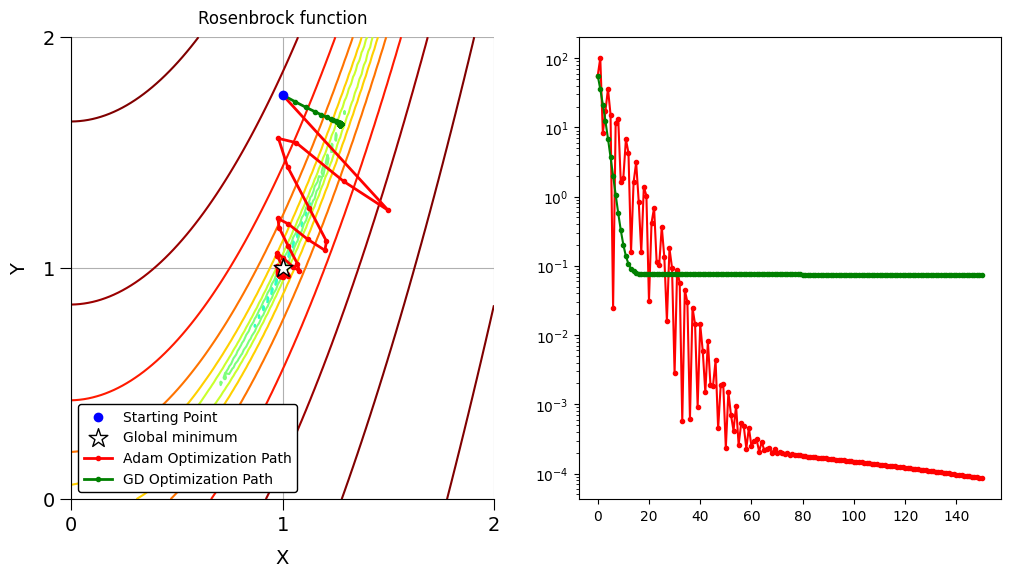

In [12]:
ax1.set_title("Rosenbrock function", pad=10)
ax1.set_ylabel("Y", fontsize=14, labelpad=10)
ax1.set_xlabel("X", fontsize=14, labelpad=10)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(
    axis="both",
    which="both",
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelbottom=True,
    labelleft=True,
    labelsize=14,
    direction="out",
    size=8,
)
ax1.set_yticks([0, 1, 2])
ax1.set_xticks([0, 1, 2])
ax1.grid(True)

legend_ax1 = ax1.legend(edgecolor="k")
legend_ax1.get_frame().set_alpha(1)
legend_ax1.get_frame().set_facecolor((1, 1, 1, 0.1))

fig

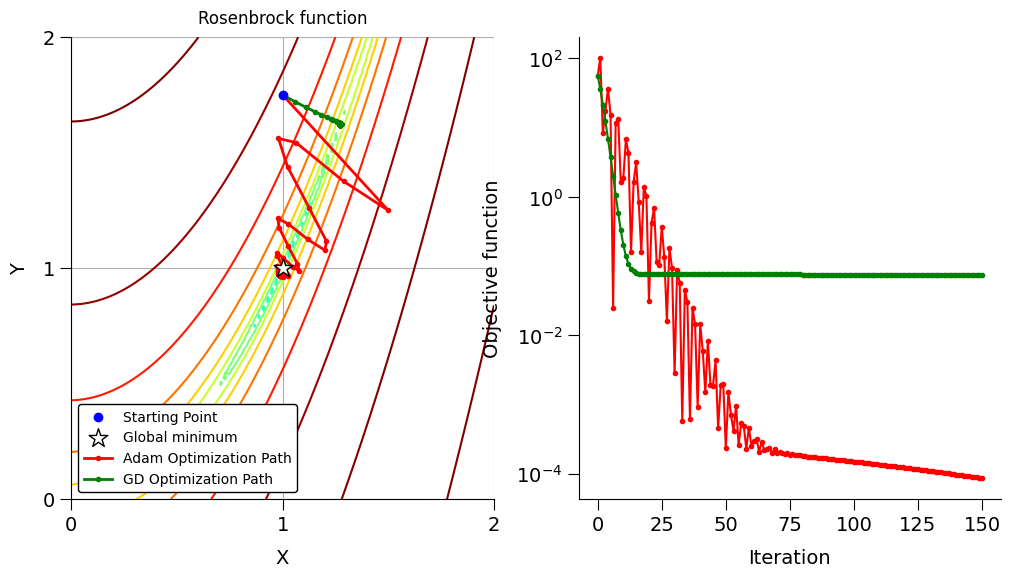

In [13]:
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(
    axis="both",
    which="major",
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelbottom=True,
    labelleft=True,
    labelsize=14,
    direction="out",
    size=8,
)
ax2.minorticks_off()
ax2.set_yticks([100, 1, 0.01, 0.0001])

ax2.set_ylabel("Objective function", fontsize=14, labelpad=10)
ax2.set_xlabel("Iteration", fontsize=14, labelpad=10)

fig

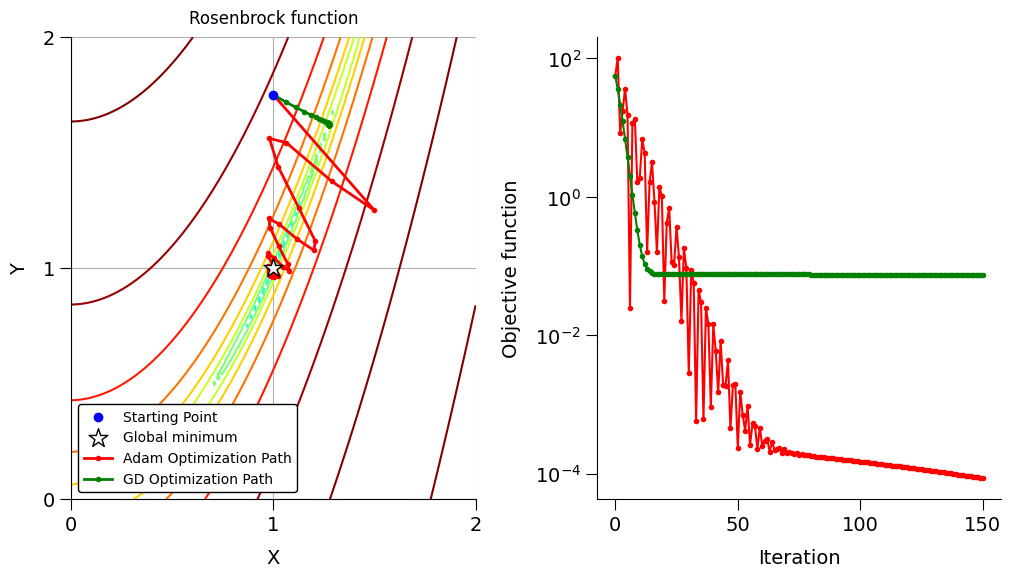

In [14]:
fig.subplots_adjust(wspace=0.3)

fig

## Adding inset with 3d axes

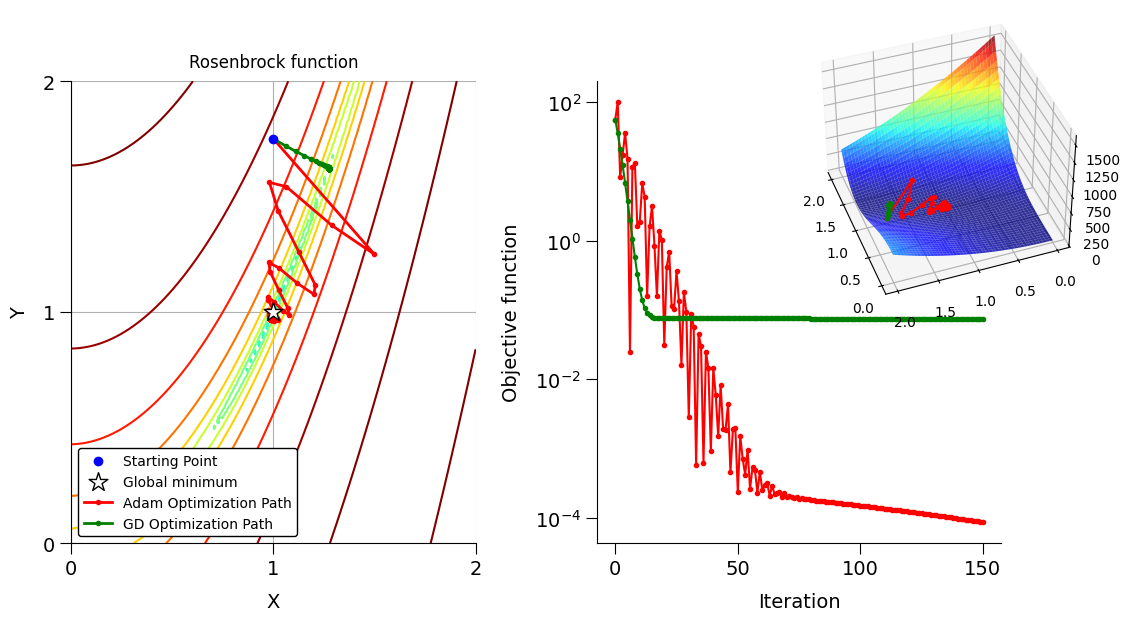

In [15]:
ax3 = fig.add_axes([0.6, 0.5, 0.5, 0.5], projection="3d", transform=ax2.transAxes)
# ax3 = fig.add_subplot(1, 3, 2, projection='3d')

ax3.plot_surface(X, Y, Z, cmap="jet", alpha=0.8)

(line3d_adam,) = ax3.plot(
    x_values_adam,
    y_values_adam,
    convergence_adam,
    "r.-",
    label="Adam Optimization Path",
    zorder=5,
    alpha=1,
)
(line3d_gd,) = ax3.plot(
    x_values_gd,
    y_values_gd,
    convergence_gd,
    "g.-",
    label="GD Optimization Path",
    zorder=5,
    alpha=1,
)

ax3.view_init(
    elev=40,
    azim=-200,
    roll=0,
)

fig

## Prettifying 3d inset

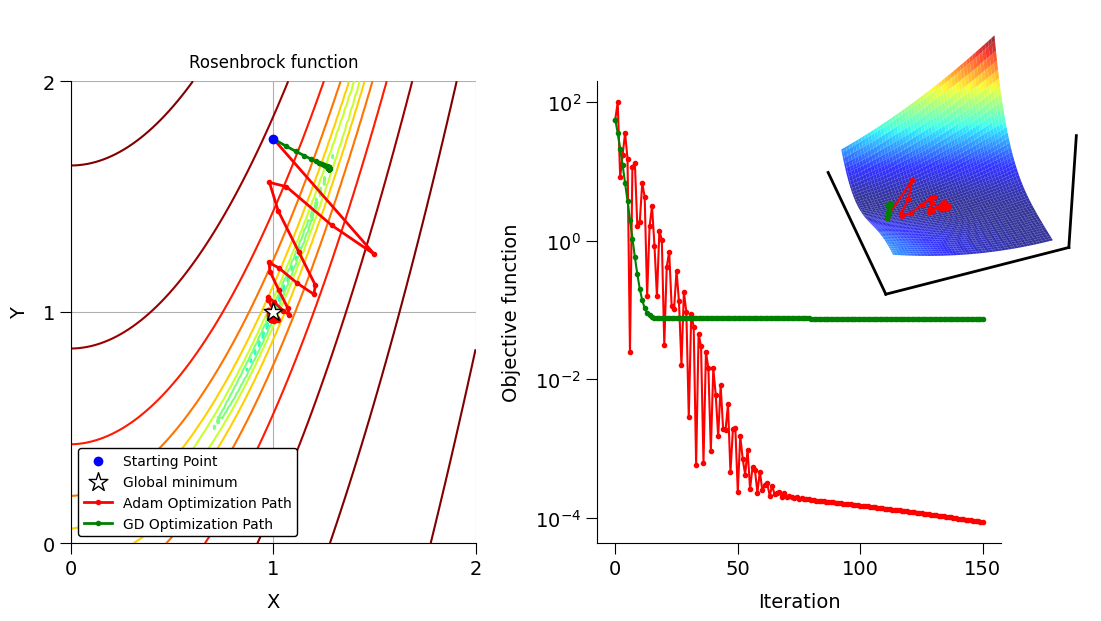

In [16]:
# Remove ticks
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])

# Get rid of colored axes planes
# First remove fill
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False

ax3.xaxis.line.set_linewidth(2)
ax3.yaxis.line.set_linewidth(2)
ax3.zaxis.line.set_linewidth(2)
ax3.patch.set_alpha(0)

# Now set color to white (or whatever is "invisible")
ax3.xaxis.pane.set_edgecolor("w")
ax3.yaxis.pane.set_edgecolor("w")
ax3.zaxis.pane.set_edgecolor("w")

fig

## Annotating subplots

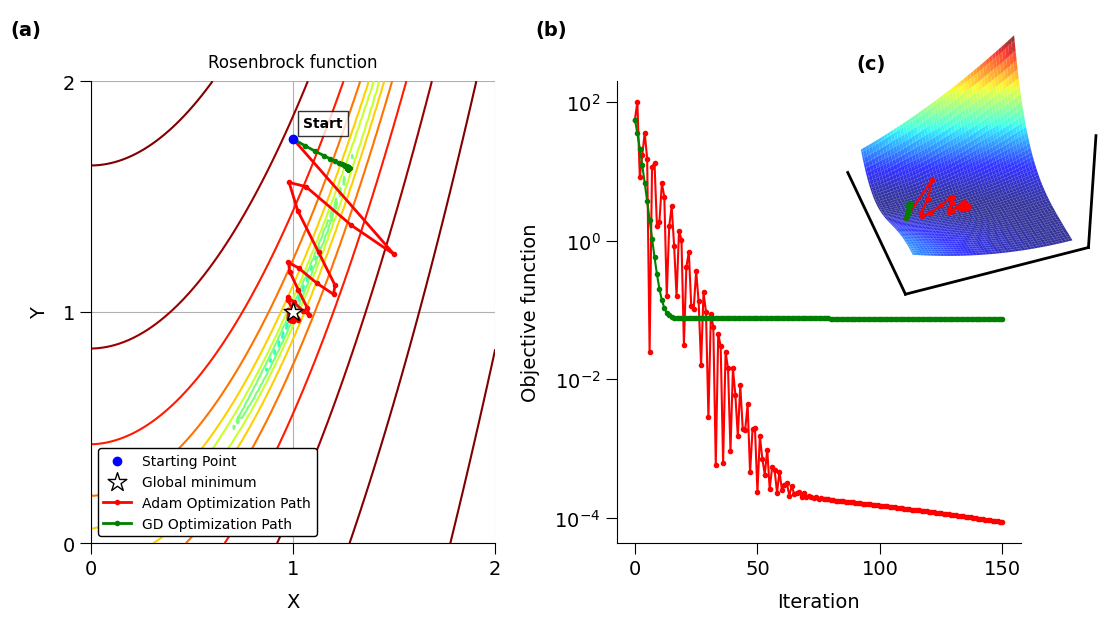

In [17]:
ax1.text(-0.2, 1.1, "(a)", transform=ax1.transAxes, fontsize=14, fontweight="bold")
ax2.text(-0.2, 1.1, "(b)", transform=ax2.transAxes, fontsize=14, fontweight="bold")
ax3.text(2, 2, 1600, "(c)", transform=ax3.transData, fontsize=14, fontweight="bold")

start_text = ax1.text(starting_point[0] + 0.05, starting_point[1] + 0.05, "Start", transform=ax1.transData, fontweight="bold",)
start_text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='k'))

fig

## Saving the figure

In [18]:
fig.savefig("visualization/figures/optimization_methods.pdf", dpi=300, bbox_inches="tight")


## Creating a GIF visualization of optimization progress

In [19]:
from matplotlib import animation


def update(frame):
    # for each frame, update the data stored on each artist.
    x_adam, x_gd = x_values_adam[:frame], x_values_gd[:frame]
    y_adam, y_gd = y_values_adam[:frame], y_values_gd[:frame]
    z_adam, z_gd = convergence_adam[:frame], convergence_gd[:frame]
    it = iterations[:frame]

    line_adam.set_xdata(x_adam)
    line_adam.set_ydata(y_adam)

    line_gd.set_xdata(x_gd)
    line_gd.set_ydata(y_gd)

    line3d_adam.set_xdata(x_adam)
    line3d_adam.set_ydata(y_adam)
    line3d_adam.set_3d_properties(z_adam)

    line_convergence_adam.set_xdata(it)
    line_convergence_adam.set_ydata(z_adam)

    line_convergence_gd.set_xdata(it)
    line_convergence_gd.set_ydata(z_gd)

    return line_adam, line_gd, line3d_adam


ani = animation.FuncAnimation(fig=fig, func=update, frames=150, interval=150)
ani.save(filename="visualization/figures/optimization_progress.gif", writer="pillow")
